In [10]:
import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity
from astroquery.gaia import Gaia
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Suppress warnings. Comment this out if you wish to see the warning messages
import warnings
warnings.filterwarnings('ignore')

from astroquery.gaia import Gaia
tables = Gaia.load_tables(only_names=True)
# for table in (tables):
#     print(table.get_qualified_name())

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]


In [27]:
job = Gaia.launch_job_async("SELECT gaia_source.source_id, gaia_source.ra, \
                                    gaia_source.ra_error, gaia_source.dec, \
                                    gaia_source.dec_error, gaia_source.parallax, \
                                    gaia_source.parallax_error, gaia_source.pmra, \
                                    gaia_source.pmdec, gaia_source.phot_g_mean_mag, \
                                    gaia_source.bp_rp, gaia_source.bp_g, \
                                    gaia_source.g_rp, gaia_source.radial_velocity, \
                                    gaia_source.radial_velocity_error, gaia_source.phot_variable_flag, \
                                    gaia_source.l, gaia_source.b, \
                                    gaia_source.teff_val, gaia_source.a_g_val, \
                                    dist.r_est, dist.r_lo, dist.r_hi, dist.r_len \
                                FROM gaiadr2.gaia_source \
                                LEFT JOIN external.gaiadr2_geometric_distance as dist on (gaia_source.source_id = dist.source_id ) \
                                WHERE \
                                CONTAINS( \
                                    POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec), \
                                    CIRCLE( \
                                    'ICRS', \
                                    COORD1(EPOCH_PROP_POS(11.798,85.244,.5053,-2.3087,-.9565,-42.0300,2000,2015.5)), \
                                    COORD2(EPOCH_PROP_POS(11.798,85.244,.5053,-2.3087,-.9565,-42.0300,2000,2015.5)), \
                                    0.4166666666666667) \
                                )=1" , dump_to_file=True, output_format='csv')
print (job)

Jobid: 1685366089290O
Phase: COMPLETED
Owner: None
Output file: 1685366089290O-result.csv
Results: None


In [1]:
import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity
from astroquery.gaia import Gaia

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Suppress warnings. Comment this out if you wish to see the warning messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
from astroquery.gaia import Gaia
tables = Gaia.load_tables(only_names=True)
for table in (tables):
    print(table.get_qualified_name())

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]
external.external.apassdr9
external.external.gaiadr2_astrophysical_parameters
external.external.gaiadr2_geometric_distance
external.external.gaiaedr3_distance
external.external.gaiaedr3_gcns_main_1
external.external.gaiaedr3_gcns_rejected_1
external.external.gaiaedr3_spurious
external.external.galex_ais
external.external.ravedr5_com
external.external.ravedr5_dr5
external.external.ravedr5_gra
external.external.ravedr5_on
external.external.ravedr6
external.external.sdssdr13_photoprimary
external.external.skymapperdr1_master
external.external.skymapperdr2_master
external.external.tmass_xsc
gaiadr1.gaiadr1.aux_qso_icrf2_match
gaiadr1.gaiadr1.ext_phot_zero_point
gaiadr1.gaiadr1.allwise_best_neighbour
gaiadr1.gaiadr1.allwise_neighbourhood
gaiadr1.gaiadr1.gsc23_best_neighbour
gaiadr1.gaiadr1.gsc23_neighbourhood
gaiadr1.gaiadr1.ppmxl_best_neighbour


In [4]:
tables[86].get_qualified_name()

'gaiadr2.gaiadr2.gaia_source'

In [6]:
type(tables[-1])

astroquery.utils.tap.model.taptable.TapTableMeta

In [8]:
job = Gaia.launch_job_async("SELECT gaia_source.source_id, gaia_source.ra, gaia_source.ra_error, gaia_source.dec, gaia_source.dec_error, gaia_source.parallax, gaia_source.parallax_error, gaia_source.phot_g_mean_mag, gaia_source.bp_rp, gaia_source.bp_g, gaia_source.radial_velocity, gaia_source.radial_velocity_error, gaia_source.phot_variable_flag, gaia_source.l, gaia_source.b, gaia_source.teff_val, gaia_source.a_g_val \
                             FROM gaiadr2.gaia_source \
                             WHERE \
                             CONTAINS(\
                                 POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),\
                                 CIRCLE(\
                                     'ICRS',\
                                    COORD1(EPOCH_PROP_POS(132.846,11.814,1.1325,-10.9737,-2.9396,33.9200,2000,2015.5)),\
                                    COORD2(EPOCH_PROP_POS(132.846,11.814,1.1325,-10.9737,-2.9396,33.9200,2000,2015.5)),\
                                 1)\
                             )=1" \
                            , dump_to_file=True, output_format='csv')

print (job)

Jobid: 1682680346630O
Phase: COMPLETED
Owner: None
Output file: 1682680346630O-result.csv
Results: None


In [14]:
m65_cluster = job.get_results()

In [23]:
m65_cluster.info()

<Table length=19423>
         name          dtype     class     n_bad
--------------------- ------- ------------ -----
            source_id   str18       Column     0
                   ra float64       Column     0
             ra_error float64       Column     0
                  dec float64       Column     0
            dec_error float64       Column     0
             parallax float64 MaskedColumn  3150
       parallax_error float64 MaskedColumn  3150
      phot_g_mean_mag float64       Column     0
                bp_rp float64 MaskedColumn  1902
                 bp_g float64 MaskedColumn  1899
      radial_velocity float64 MaskedColumn 19081
radial_velocity_error float64 MaskedColumn 19081
   phot_variable_flag   str13       Column     0
                    l float64       Column     0
                    b float64       Column     0
             teff_val float64 MaskedColumn 15083
              a_g_val float64 MaskedColumn 16090


In [24]:
len(m65_cluster)

19423

In [25]:
m65_cluster.columns

<TableColumns names=('source_id','ra','ra_error','dec','dec_error','parallax','parallax_error','phot_g_mean_mag','bp_rp','bp_g','radial_velocity','radial_velocity_error','phot_variable_flag','l','b','teff_val','a_g_val')>

In [26]:
m65_cluster[['source_id', 'ra', 'dec', 'parallax', 'phot_g_mean_mag', 'bp_rp', 'bp_g', 'l', 'b', 'teff_val', 'a_g_val']][:5]

source_id,ra,dec,parallax,phot_g_mean_mag,bp_rp,bp_g,l,b,teff_val,a_g_val
str18,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
598691984069077248,132.94536968437498,11.258305499355092,2.3904768434206956,19.998251,2.4622784,1.1555309,216.332780534556,31.775110305372934,--,--
598658178377009408,132.43904844191852,10.946329112475633,1.697264527907258,15.285919,1.2350359,0.5488453,216.4165337172158,31.192802292650445,4873.92,0.0213
598872544489581568,132.15378524601394,11.365852264316905,0.11883871674403013,18.999584,1.192419,0.45717812,215.83389853922966,31.11714253043872,--,--
598864641751136512,132.20482052784936,11.160984893513929,-0.7379959855291446,20.758738,0.9287262,0.07074547,216.07542154532555,31.07587370764362,--,--
598676693985469312,132.92758447553285,11.113314085459296,2.9517578577347763,19.548708,2.5117397,1.23979,216.4784590671358,31.697801423493843,--,--


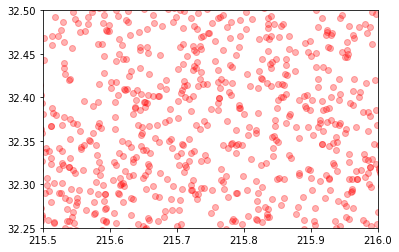

In [27]:
plt.scatter(m65_cluster['l'], m65_cluster['b'], color='r', alpha=0.3)
plt.xlim(215.5,216)
plt.ylim(32.25,32.50)

plt.show()

In [28]:
np.mean(m65_cluster['parallax'])

0.9639557753703205

In [29]:
np.std(m65_cluster['parallax'])

1.3532561517635624